# Inferential Statistics Ia - Frequentism

In [2]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

In [3]:
?norm

__A:__Probability Density Function or PDF

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__ norm.rvs

In [26]:
seed(47)
# draw five samples here
rv= norm.rvs(size=5)
print(rv)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

__A:__ The mean is 0.19. No, it is not exactly equal to 0, which is the mean of a standard normal distribution.

In [27]:
# Calculate and print the mean here, hint: use np.mean()
m = np.mean(rv)
print(m)

0.19355593334131074


__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__ std of these numbers is 0.96

In [29]:
sd = np.sqrt(np.sum((rv-m)*(rv-m))/len(rv))
print(sd)

0.9606195639478641


Here we have calculated the actual standard deviation of a small (size 5) data set. But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die. In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__  1.07

In [31]:
sd_pop = np.sqrt(np.sum((rv-m)*(rv-m))/(len(rv)-1))
print(sd_pop)

1.0740053227518152


__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__ sd = sd_np   It returned the std for the samples.

In [32]:
sd_np = np.std(rv)
print(sd_np)

0.9606195639478641


__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__  The keyword arguement ddof (degrees of freedom) need to be specified to get the Bessel correction in the std.

In [34]:
sd_pop_np = np.std(rv, ddof=1)
print(sd_pop_np)

1.0740053227518152


## II Sampling distributions

In [35]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

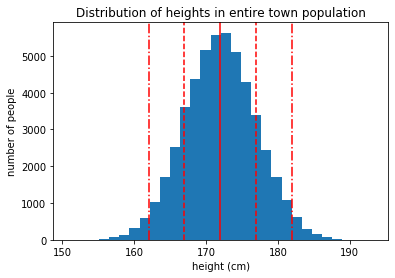

In [36]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [37]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [38]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

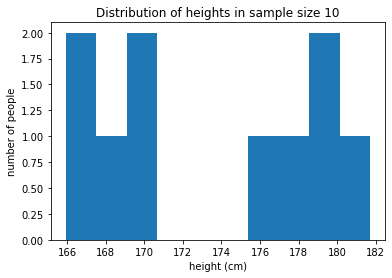

In [39]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?

In [40]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [41]:
daily_sample2 = townsfolk_sampler(10)

In [42]:
np.mean(daily_sample2)

173.7317666636263

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__ The simulation is done for 365 days of the year and the mean is stored in a list 'm'. The means are then plotted on a histogram and the mean of this list in calculated.

In [43]:
seed(47)
# take your samples here
m = []
for i in range(365):
    s = townsfolk_sampler(10)
    m.append(np.mean(s))

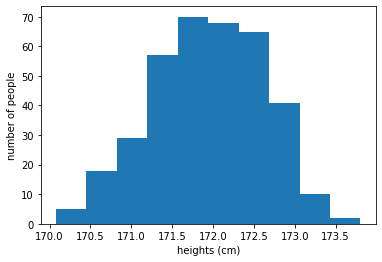

In [59]:
_ = plt.hist(m)
_ = plt.xlabel('heights (cm)')
_ = plt.ylabel('number of people')

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q:__ Verify the above results from the CLT.

__A:__  The expected mean of the distribution, 171.86 is almost equal to the population mean 172. The standard deviation of the distribution, 1.575 is almost equal to the calculated 1.58

In [50]:
mean_samp_dist = np.mean(m)
print(mean_samp_dist)

171.8660049358649


In [51]:
std_samp_dist = np.std(m)
std_clt = 5/np.sqrt(10)
print(std_samp_dist)
print(std_clt)

1.5756704135286475
1.5811388300841895


__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__  The larger sample makes the distribution more narrower and the mean approximates the population mean better

In [61]:
seed(47)
# calculate daily means from the larger sample size here
m_large = []
for i in range(365):
    s = townsfolk_sampler(50)
    m_large.append(np.mean(s))

In [62]:
mean_large_samp_dist = np.mean(m_large)
print(mean_large_samp_dist)

std_large_samp_dist = np.std(m_large)
std_large_clt = 5/np.sqrt(50)
print(std_large_samp_dist)
print(std_large_clt)

171.94366080916114
0.6736107539771146
0.7071067811865475


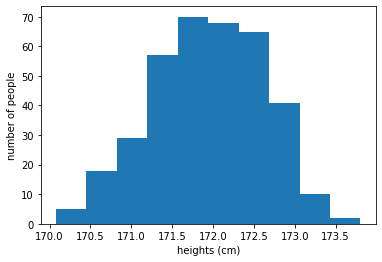

In [63]:
_ = plt.hist(m_large)
_ = plt.xlabel('heights (cm)')
_ = plt.ylabel('number of people')

### III Normally testing times!

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__  0.841

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__ using the cdf() we get the same answer.

In [67]:
print(norm.cdf(1))

0.8413447460685429


__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__ Mean is 172 and std is 5. Hence, 177 is one std above the mean. So using the normal curve, the probability of selecting one person with a height of 177 or less is 0.841

In [68]:
print(norm.cdf(1))

0.8413447460685429

__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__ 2 m is 200 cms. That is 28 cms more than the mean 172 cms and is 28/5=5.6 std more/away from the mean. The probability of seeing a 2 m tall or less person is norm.cdf(5.6). But, of seeing someone at least 2 m is 1-norm.cdf(5.6) which is very very low.

In [71]:
print(1-norm.cdf(5.6))

1.0717590259723409e-08


__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

__A:__ Yes, this interval includes the true population mean as shown below.

In [137]:
seed(47)
# take your sample now
sample = townsfolk_sampler(50)

In [138]:
# estimating the population mean
pop_mean = round(np.mean(sample), 2)
print(pop_mean)

172.78


In [139]:
# estimating the population std with Bessel correction
pop_std = round(np.std(sample, ddof=1), 2)
print(pop_std)

4.2


In [140]:
# 95% confidence interval is calculated from the z table as 1.96 or as follows

alpha = 1-.95                       # alpha or the difference are calculated
alpha_two = alpha/2                 # divided by 2 for the 2 sides
area = 1-alpha_two                  # area on center only
z = norm.ppf(area)                  # gives critical value for 95% confidence interval
print(round(z, 2))

1.96


In [150]:
# calculated the margin of error by multiplying the z score to the standard error as we have only the sample. 
# Standard error is std/sqrt of sample size

margin_of_error = round(z,2) * pop_std/np.sqrt(50)
print(margin_of_error)

1.1641806045455316


In [151]:
# the 95% confidence interval will have the following heights as their lower and higher limit
print(pop_mean - margin_of_error, pop_mean + margin_of_error)

171.61581939545448 173.94418060454552


__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ We are assuming that the sample mean is a good representation of the population mean and instead of the actual population standard deviation, the unbiased standard deviation of the sample is used.

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__ The 95% confidence interval for the mean using the t distribution is slightly wider than the interval with the z statistic.

In [143]:
seed(47)
# take your sample now
sample_t = townsfolk_sampler(50)

In [144]:
# estimating the population mean
pop_mean_t = round(np.mean(sample_t), 2)
print(pop_mean_t)

172.78


In [145]:
# estimating the population std with Bessel correction
pop_std_t = round(np.std(sample_t, ddof=1), 2)
print(pop_std_t)

4.2


In [152]:
# 95% confidence interval is calculated from the t table after getting the alpha/2 and degrees of freedom

alpha_t = 1-.95                       # alpha or the difference are calculated
alpha_two_t = alpha/2                 # divided by 2 for the 2 sides
area_t = 1-alpha_two_t                # area under 95% interval
df = len(sample_t)-1                  # degrees of freedom is length of sample-1
t_stat = t.ppf(area_t, df)
print(t_stat)
print(df)

2.009575234489209
49


In [153]:
# calculated the margin of error by multiplying the z score to the standard error as we have only the sample. 
# Standard error is std/sqrt of sample size

margin_of_error_t = t_stat * pop_std_t/np.sqrt(50)
print(margin_of_error_t)

1.1936267915139676


In [154]:
# the 95% confidence interval will have the following heights as their lower and higher limit
print(pop_mean_t - margin_of_error_t, pop_mean_t + margin_of_error_t)

171.58637320848604 173.97362679151396


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.